In [4]:
import xarray as xr
import numpy as np
import os
from stormlab.simulation import rainfall_simulation
import matplotlib.pyplot as plt

In [5]:
# read argument input
ar_id = 202200018
realization = 1

# Get the current working directory (where your Jupyter Notebook is located)
notebook_dir = os.getcwd()
# Construct the relative path to the data directory
cesm_rainstorm_noise_folder = os.path.join(notebook_dir, "../data/cesm2/cesm2_rainstorm_simulation")
cesm_rainstorm_distr_param_folder = os.path.join(notebook_dir, "../data/cesm2/cesm2_rainstorms_distr_params")

# load noise field realization
noise_xarray = xr.load_dataset(cesm_rainstorm_noise_folder + "/" + "{0}_{1}_noise.nc".format(ar_id, realization))

# load rainfall probability
logic_mu_xarray = xr.load_dataset(cesm_rainstorm_distr_param_folder + "/" + "{0}_logit_wet_p.nc".format(ar_id))
# load scipy parameters
scipy_a_xarray = xr.load_dataset(cesm_rainstorm_distr_param_folder + "/" + "{0}_scipy_a.nc".format(ar_id))
scipy_gg_c_xarray = xr.load_dataset(cesm_rainstorm_distr_param_folder + "/" + "{0}_scipy_c.nc".format(ar_id))
scipy_scale_xarray = xr.load_dataset(cesm_rainstorm_distr_param_folder + "/" + "{0}_scipy_scale.nc".format(ar_id))

# get the noise array
noise_array = noise_xarray['aorc'].data
lat_data = noise_xarray['latitude'].data
lon_data = noise_xarray['longitude'].data
time_steps = noise_xarray['time'].data
# get GG and logistic regression model parameters
logic_mu_array = logic_mu_xarray['aorc'].data
scipy_a_array = scipy_a_xarray['aorc'].data
scipy_gg_c_array = scipy_gg_c_xarray['aorc'].data
scipy_scale_array = scipy_scale_xarray['aorc'].data

## Precipitation simulation
```
Function: rainfall_simulation(noise_array, logic_mu_array, scipy_a_array, scipy_scale_array, scipy_gg_c_array)
```
Parameters: 
- **noise_array** (numpy.ndarray): Array of noise fields generated to represent precipitation spatiotemporal structures. The dimension is (time, lat, lon). 
- **logic_mu_array** (numpy.ndarray): Array of precipitation occurrence probability at each grid cell obtained from logistic regression, conditioned on current coarse-scale atmospheric variables. The dimension is (time, lat, lon).  
- **scipy_a_array** (numpy.ndarray): Array of parameter a for gamma distribution at each grid cell, conditioned on current coarse-scale atmospheric variables. The dimension is (time, lat, lon). 
- **scipy_scale_array** (numpy.ndarray): Array of parameter scale for gamma distribution at each grid cell, conditioned on current coarse-scale atmospheric variables. The dimension is (time, lat, lon). 
- **scipy_gg_c_array** (numpy.ndarray): Array of parameter c at each grid cell. The dimension is (lat, lon). 

Returns: 
- **sim_rainfall_array** (numpy.ndarray): Array of simulated precipitation fields with dimension of (time, lat, lon). The unit is mm. 


In [6]:
sim_rainfall_array = rainfall_simulation(noise_array, logic_mu_array, scipy_a_array, scipy_scale_array, scipy_gg_c_array)

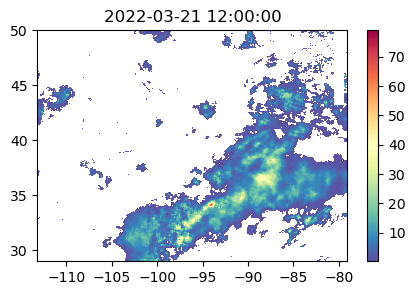

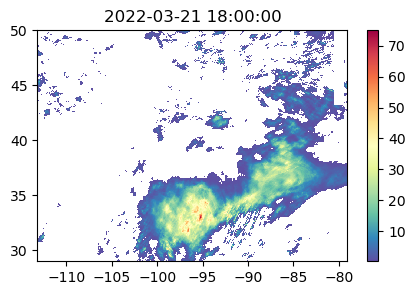

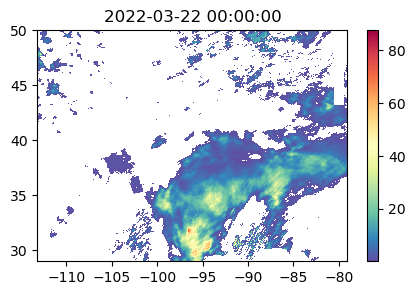

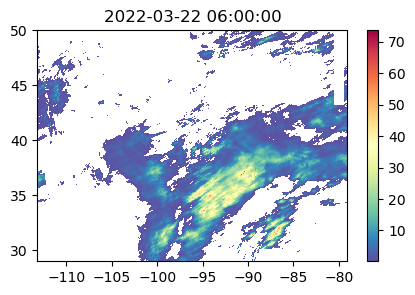

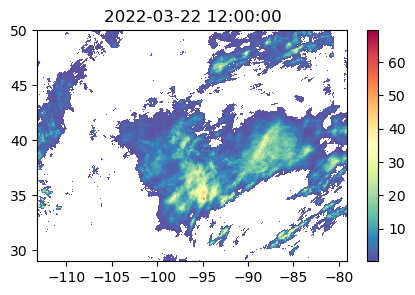

In [7]:
for time_index in np.arange(5, 10): 
    plt.figure(figsize = (5, 3))
    plt.title(time_steps[time_index])
    plt.pcolormesh(lon_data, lat_data, np.ma.masked_where(sim_rainfall_array[time_index] < 0.2, sim_rainfall_array[time_index]), cmap = 'Spectral_r')
    plt.colorbar()